In [2]:
# %load ../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

sys.path.append('..')

from utils import gen_covariance, gen_beta2, gen_data, get_cov_list
from utils import selection_accuracy, calc_avg_cov
from sklearn.linear_model import LassoLars, lasso_path, LinearRegression
from misc import group_dictionaries
from pyuoi.linear_model import UoI_Lasso

In [3]:
from matplotlib import colors

In [4]:
from postprocess import postprocess_dir

In [5]:
import pickle

In [3]:
uoi = postprocess_dir('../../selectionfinal', exp_type = 'UoILasso', fields = ['FNR', 'FPR'])

397
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [5]:
scad = postprocess_dir('../../selectionfinal', exp_type='scad', fields=['FNR', 'FPR'])

400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [7]:
mcp = postprocess_dir('../../selectionfinal', exp_type='mcp', fields=['FNR', 'FPR'])

400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [10]:
en = postprocess_dir('../../selectionfinal', exp_type='EN',fields=['FNR','FPR'])

400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [11]:
lasso = postprocess_dir('../../selectionfinal', exp_type='CV_Lasso',fields=['FNR','FPR'])

400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [14]:
# Save to pickle
with open('../../selectionfinal/pp_results.dat', 'wb') as f:
    pickle.dump(uoi, f)
    pickle.dump(scad, f)
    pickle.dump(mcp, f)
    pickle.dump(en, f)
    pickle.dump(lasso, f)

In [8]:
# Load from pickle
with open('../../selectionfinal/pp_results.dat', 'rb') as f:
    uoi = pickle.load(f)
    scad = pickle.load(f)
    mcp = pickle.load(f)
    en = pickle.load(f)
    lasso = pickle.load(f)

In [9]:
def filter_by_dict(df, root_key, dict_filter):
    
    col = df[root_key].values
    
    filtered_idxs = []
    
    for i, c in enumerate(col):
        match = True
        for key, val in dict_filter.items(): 
            if c[key] != val:
                match = False
        if match:
            filtered_idxs.append(i)
    
    return df.iloc[filtered_idxs]

In [10]:
# Shortcut to apply multiple filters to pandas dataframe
def apply_df_filters(df, **kwargs):
    
    filtered_df = df
    
    for key, value in kwargs.items():
    
        # If the value is the dict 
        if type(value) == dict:
            
            filtered_df = filter_by_dict(filtered_df, key, value)
            
        else:
    
            filtered_df = filtered_df.loc[filtered_df[key] == value]

    return filtered_df

In [11]:
# Task: Get the unique dictionaries of cov_params from the dataframe 
def unique_cov_params(df):
    cov_params = df['cov_params'].values
    unique_cov_params, cov_idxs = group_dictionaries(cov_params, None)
    unique_cov_dicts = []
    for ucp in unique_cov_params:
        ucd = {'correlation' : ucp[0], 'block_size' : ucp[1], 'L' : ucp[2], 't': ucp[3]}
        unique_cov_dicts.append(ucd)
    
    return unique_cov_dicts, cov_idxs

In [12]:
# Task: Given the indices of repeated elements, select the FNR and FPR and average them together
def average_fields(df, fields, rep_idxs):
    results = []
        
    for i, field in enumerate(fields):
        # Pass in None to not average
        if rep_idxs is None:
            values = np.zeros(df.shape[0])
            for j in range(df.shape[0]):
                values[j] = df.iloc[j][field]
        else:
            values = np.zeros(len(rep_idxs))
            for j, rep_idx in enumerate(rep_idxs):
                values[j] = np.mean(df.iloc[rep_idx][field])

        results.append(values)
    
    return tuple(results)

In [13]:
sparsity = np.unique(uoi['sparsity'].values)

In [14]:
sparsity

array([0.04624822, 0.06115754, 0.08087327, 0.10694488, 0.14142136,
       0.18701223, 0.2473005 , 0.32702428, 0.4324491 , 0.57186037,
       0.7562145 , 1.        ])

In [15]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

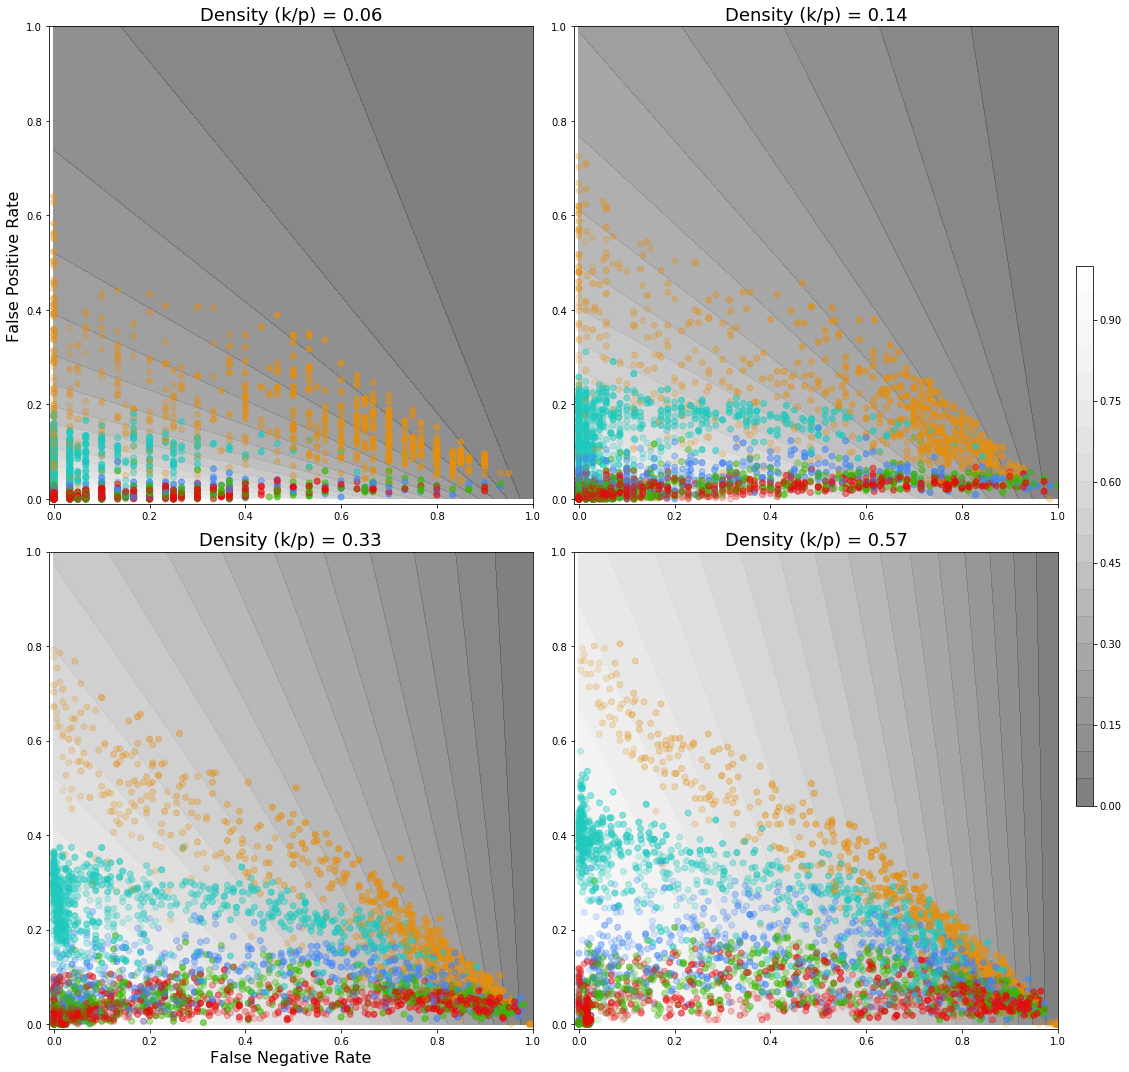

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
scatters = []
n_features = 500
sparsity_ = [sparsity[1], sparsity[4], sparsity[7], sparsity[9]]
kappa_ = [100, 5, 2]
# Fix the betawidth, selection method, SNR
betawidth = np.inf

for i, s in enumerate(sparsity_):
    
    a = ax[np.unravel_index(i, (2, 2))]
    
    # Superimpose contours of constant selection accuracy
    xx = np.linspace(0, 1, 100)
    yy = np.linspace(0, 1, 100)
    z = np.zeros((100, 100))
    for ix, x in enumerate(xx):
        for iy, y in enumerate(yy):
            z[ix, iy] = 1 - ((1 - s)* y + s * x)/(s * (2 - x - y) + y) 
    
    cmap = plt.get_cmap('Greys_r')
    cmap_new = truncate_colormap(cmap, minval = 0.25)
    cs = a.contourf(xx, yy, z.T, 20, cmap = cmap_new, alpha = 0.75)

    # Set opacity via average correlation

    # Blue
    c1 = ['#4286f4', '#99bdf7', '#00aeff']
    # Green
    c2 = ['#3ab700', '#bae288', '#64821d']
    # Red
    c3 = ['#e50b0b', '#ef5f5f', '#70001d']
    # Cyan
    c4 = ['#1ec9be', '#d799ff', '#572677']
    # Orange
    c5 = ['#e38f12']
    
    for j, k in enumerate(kappa_):
        for ii, bw in enumerate([np.inf, -1, 0.1]):   
            en_ = apply_df_filters(en, sparsity=s, selection_method='BIC', kappa = k,
                                   betadict = {'betawidth': bw})
            lasso_ = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='BIC'
                                     , betadict = {'betawidth': bw})
            uoi_ = apply_df_filters(uoi, sparsity=s, kappa = k, selection_method= 'BIC'
                                   , betadict = {'betawidth': bw})
            mcp_ = apply_df_filters(mcp, sparsity=s, kappa = k, selection_method='BIC'
                                   , betadict = {'betawidth': bw})
            scad_ = apply_df_filters(scad, sparsity = s, kappa = k, selection_method='BIC'
                                    , betadict = {'betawidth': bw}) 

            # Need to acquire the unique cov_params, calculate the average covariance, and then the
            en_cov_params, en_rep_idxs = unique_cov_params(en_)
            lasso_cov_params, lasso_rep_idxs = unique_cov_params(lasso_)
            scad_cov_params, scad_rep_idxs = unique_cov_params(scad_)
            mcp_cov_params, mcp_rep_idxs = unique_cov_params(mcp_)
            uoi_cov_params, uoi_rep_idxs = unique_cov_params(uoi_)

            en_avgcov = [calc_avg_cov(500, **ecp) for ecp in en_cov_params]
            lasso_avgcov = [calc_avg_cov(500, **lcp) for lcp in lasso_cov_params]
            scad_avgcov = [calc_avg_cov(500, **scp) for scp in scad_cov_params]
            mcp_avgcov = [calc_avg_cov(500, **mcp) for mcp in mcp_cov_params]     
            uoi_avgcov = [calc_avg_cov(500, **ucp) for ucp in uoi_cov_params]

            # Average together values 
            en_FNR, en_FPR = average_fields(en_, ['FNR', 'FPR'], en_rep_idxs)
            lasso_FNR, lasso_FPR = average_fields(lasso_, ['FNR', 'FPR'], lasso_rep_idxs)
            scad_FNR, scad_FPR = average_fields(scad_, ['FNR', 'FPR'], scad_rep_idxs)
            mcp_FNR, mcp_FPR = average_fields(mcp_, ['FNR', 'FPR'], mcp_rep_idxs)
            uoi_FNR, uoi_FPR = average_fields(uoi_, ['FNR', 'FPR'], uoi_rep_idxs)

            # Don't average together values
    #         en_FNR, en_FPR = average_fields(en_, ['FNR', 'FPR'], None)
    #         lasso_FNR, lasso_FPR = average_fields(lasso_, ['FNR', 'FPR'], None)
    #         scad_FNR, scad_FPR = average_fields(scad_, ['FNR', 'FPR'], None)
    #         mcp_FNR, mcp_FPR = average_fields(mcp_, ['FNR', 'FPR'], None)
    #         uoi_FNR, uoi_FPR = average_fields(uoi_, ['FNR', 'FPR'], None)

    #         # Map the average covariances to their repeated indices
    #         en_repcov = np.zeros(len(en_FNR))
    #         for j, rep_idx in enumerate(en_rep_idxs):
    #             en_repcov[rep_idx] = en_avgcov[j]

    #         lasso_repcov = np.zeros(len(lasso_FNR))
    #         for j, rep_idx in enumerate(lasso_rep_idxs):
    #             lasso_repcov[rep_idx] = lasso_avgcov[j]

    #         scad_repcov = np.zeros(len(scad_FNR))
    #         for j, rep_idx in enumerate(scad_rep_idxs):
    #             scad_repcov[rep_idx] = scad_avgcov[j]

    #         mcp_repcov = np.zeros(len(mcp_FNR))
    #         for j, rep_idx in enumerate(mcp_rep_idxs):
    #             mcp_repcov[rep_idx] = mcp_avgcov[j]

    #         uoi_repcov = np.zeros(len(uoi_FNR))
    #         for j, rep_idx in enumerate(uoi_rep_idxs):
    #             uoi_repcov[rep_idx] = uoi_avgcov[j]            

            c = [colors.to_rgba(c4[0], alpha = np.power(avgcov, 0.35)) for avgcov in lasso_avgcov]
            scatters.append(a.scatter(lasso_FNR, lasso_FPR, c = c))

            c = [colors.to_rgba(c5[0], alpha = np.power(avgcov, 0.35)) for avgcov in en_avgcov]
            scatters.append(a.scatter(en_FNR, en_FPR, c = c))

            c = [colors.to_rgba(c1[0], alpha = np.power(avgcov, 0.35)) for avgcov in scad_avgcov]
            scatters.append(a.scatter(scad_FNR, scad_FPR, c = c))

            c = [colors.to_rgba(c2[0], alpha = np.power(avgcov, 0.35)) for avgcov in mcp_avgcov]
            scatters.append(a.scatter(mcp_FNR, mcp_FPR, c = c))

            c = [colors.to_rgba(c3[0], alpha = np.power(avgcov, 0.35)) for avgcov in uoi_avgcov]
            scatters.append(a.scatter(uoi_FNR, uoi_FPR, c = c))
        
    a.set_xlim([-0.01, 1])
    a.set_ylim([-0.01, 1])
    a.set_title('Density (k/p) = %.2f' % s, fontsize = 18)

ax[0, 0].set_ylabel('False Positive Rate', fontsize = 16)
ax[1, 0].set_xlabel('False Negative Rate', fontsize = 16)
cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(cs, cax = cax)
plt.tight_layout()
plt.savefig('fprvfnr_BIC.pdf', bbox_inches = 'tight', pad_inches=0)

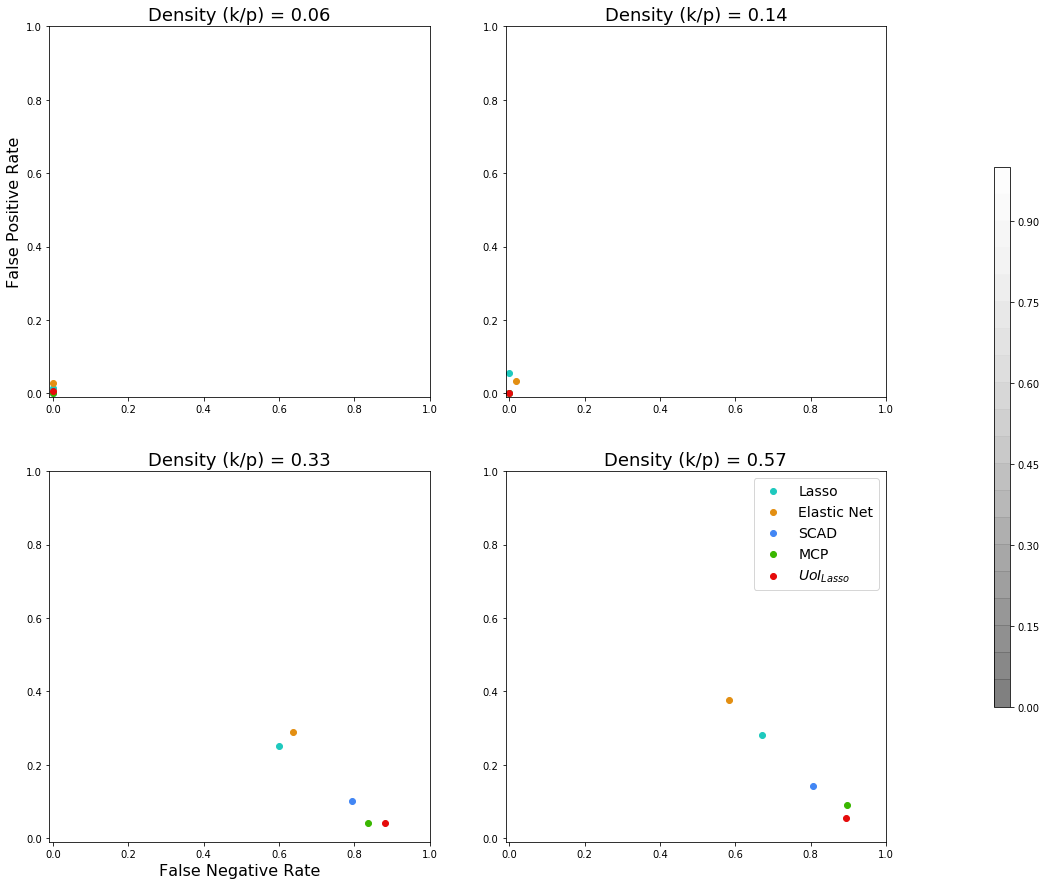

In [20]:
# Replot to grab the legend

fig, ax = plt.subplots(2, 2, figsize = (15, 15))
scatters = []
n_features = 500
sparsity_ = [sparsity[1], sparsity[4], sparsity[7], sparsity[9]]
kappa_ = [100, 5, 2]
# Fix the betawidth, selection method, SNR
betawidth = np.inf

for i, s in enumerate(sparsity_):
    
    a = ax[np.unravel_index(i, (2, 2))]
    
    # Blue
    c1 = ['#4286f4', '#99bdf7', '#00aeff']
    # Green
    c2 = ['#3ab700', '#bae288', '#64821d']
    # Red
    c3 = ['#e50b0b', '#ef5f5f', '#70001d']
    # Cyan
    c4 = ['#1ec9be', '#d799ff', '#572677']
    # Orange
    c5 = ['#e38f12']
    
    en_ = apply_df_filters(en, sparsity=s, selection_method='BIC', kappa = k,
                           betadict = {'betawidth': bw})
    lasso_ = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='BIC'
                             , betadict = {'betawidth': bw})
    uoi_ = apply_df_filters(uoi, sparsity=s, kappa = k, selection_method= 'BIC'
                           , betadict = {'betawidth': bw})
    mcp_ = apply_df_filters(mcp, sparsity=s, kappa = k, selection_method='BIC'
                           , betadict = {'betawidth': bw})
    scad_ = apply_df_filters(scad, sparsity = s, kappa = k, selection_method='BIC'
                            , betadict = {'betawidth': bw}) 

    # Need to acquire the unique cov_params, calculate the average covariance, and then the
    en_cov_params, en_rep_idxs = unique_cov_params(en_)
    lasso_cov_params, lasso_rep_idxs = unique_cov_params(lasso_)
    scad_cov_params, scad_rep_idxs = unique_cov_params(scad_)
    mcp_cov_params, mcp_rep_idxs = unique_cov_params(mcp_)
    uoi_cov_params, uoi_rep_idxs = unique_cov_params(uoi_)

    en_avgcov = [calc_avg_cov(500, **ecp) for ecp in en_cov_params]
    lasso_avgcov = [calc_avg_cov(500, **lcp) for lcp in lasso_cov_params]
    scad_avgcov = [calc_avg_cov(500, **scp) for scp in scad_cov_params]
    mcp_avgcov = [calc_avg_cov(500, **mcp) for mcp in mcp_cov_params]     
    uoi_avgcov = [calc_avg_cov(500, **ucp) for ucp in uoi_cov_params]

    # Average together values 
    en_FNR, en_FPR = average_fields(en_, ['FNR', 'FPR'], en_rep_idxs)
    lasso_FNR, lasso_FPR = average_fields(lasso_, ['FNR', 'FPR'], lasso_rep_idxs)
    scad_FNR, scad_FPR = average_fields(scad_, ['FNR', 'FPR'], scad_rep_idxs)
    mcp_FNR, mcp_FPR = average_fields(mcp_, ['FNR', 'FPR'], mcp_rep_idxs)
    uoi_FNR, uoi_FPR = average_fields(uoi_, ['FNR', 'FPR'], uoi_rep_idxs)

    a.scatter(lasso_FNR[0], lasso_FPR[0], c = c4[0])

    a.scatter(en_FNR[0], en_FPR[0], c = c5[0])

    a.scatter(scad_FNR[0], scad_FPR[0], c = c1[0])

    a.scatter(mcp_FNR[0], mcp_FPR[0], c = c2[0])

    a.scatter(uoi_FNR[0], uoi_FPR[0], c = c3[0])
        
    a.set_xlim([-0.01, 1])
    a.set_ylim([-0.01, 1])
    a.set_title('Density (k/p) = %.2f' % s, fontsize = 18)
    

plt.legend(['Lasso', 'Elastic Net', 'SCAD', 'MCP', r'$UoI_{Lasso}$'], fontsize = 14)
ax[0, 0].set_ylabel('False Positive Rate', fontsize = 16)
ax[1, 0].set_xlabel('False Negative Rate', fontsize = 16)

cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(cs, cax = cax)
plt.savefig('fprvfnr_legend.pdf', bbox_inches = 'tight', pad_inches=0)